# Bloch point

To obtain a Bloch point magnetisation field, we simulate a disk with $150 \,\text{nm}$ diameter. It consists of two layers:

- bottom later with $D<0$ and thickness $20 \,\text{nm}$
- top later with $D>0$ and thickness $10 \,\text{nm}$

Let us first define the mesh with two subregions:

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as mc

# FeGe paratemeters
A = 8.78e-12  # J/m
D = 1.58e-3  # J/m2
Ms = 3.84e5  # A/m
alpha = 0.28

# Geometry parameters
d = 150e-9  # disk diameter (m)
hb = 20e-9  # bottom layer thickness (m)
ht = 10e-9  # top layer thickness (m)

cell = (3e-9, 3e-9, 2e-9)  # discretisation cell size (m)

region = df.Region(p1=(-d/2, -d/2, -hb), p2=(d/2, d/2, ht))
subregions = {'bottom': df.Region(p1=(-d/2, -d/2, -hb), p2=(d/2, d/2, 0)),
              'top': df.Region(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, ht))}
mesh = df.Mesh(region=region, cell=cell, subregions=subregions)

mesh.mpl_subregions()

We pass disk geometry via `norm`:

In [6]:
def disk_function(point):
    x, y, z = point
    if x**2 + y**2 < (d/2)**2:
        return Ms
    else:
        return 0
    
m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=disk_function)  # initial magnetisation state

Now, we define system object with energy equation which constains:

- Exchange
- DMI
- Demagnetisation

In [7]:
system = mm.System(name='bp_field')
system.energy = mm.Exchange(A=A) + mm.DMI(D={'bottom': -D, 'top': D, 'top:bottom': D}, crystalclass='T') + mm.Demag()
system.m = m
system.energy

Exchange(A=8.78e-12) + DMI(D={'bottom': -0.00158, 'top': 0.00158, 'top:bottom': 0.00158}, crystalclass='T') + Demag()

Finally, we relax the system:

In [8]:
md = mc.MinDriver()
md.drive(system)

ValueError: The T crystal class is not supported on win32 platform.

Top view of magnetisation field:

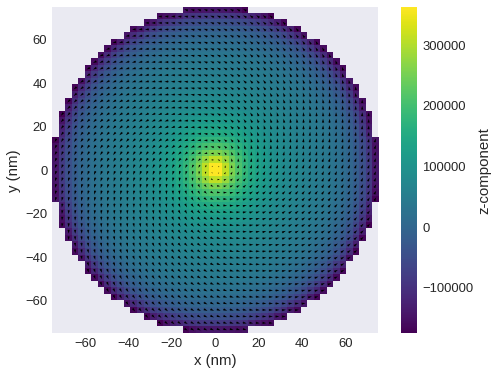

In [5]:
m.plane('z').mpl()

Cross section of magnetisations field:

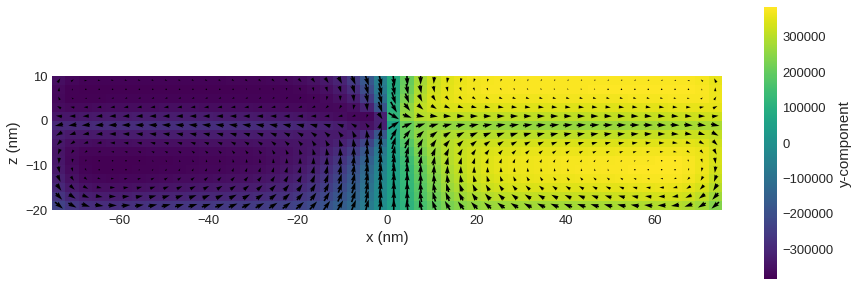

In [6]:
m.plane('y').mpl(figsize=(15, 5), vector_scale=2e7)

We save the field in OVF file format:

In [7]:
system.m.write('bloch-point.omf')

Similarly, we can access the field as a numpy array:

In [5]:
import numpy as np
np.shape(system.m.array)

(50, 50, 15, 3)